## Intro

### Context
League of Legends is a MOBA (multiplayer online battle arena) where 2 teams (blue and red) face off. There are 3 lanes, a jungle, and 5 roles. The goal is to take down the enemy Nexus to win the game.

### Content
This dataset contains the first 10min. stats of approx. 10k ranked games (SOLO QUEUE) from a high ELO (DIAMOND I to MASTER). Players have roughly the same level.

Each game is unique. The gameId can help you to fetch more attributes from the Riot API.

There are 19 features per team (38 in total) collected after 10min in-game. This includes kills, deaths, gold, experience, level… It's up to you to do some feature engineering to get more insights.

The column blueWins is the target value (the value we are trying to predict). A value of 1 means the blue team has won. 0 otherwise.

So far I know, there is no missing value.

### Glossary
Warding totem: An item that a player can put on the map to reveal the nearby area. Very useful for map/objectives control.  
Minions: NPC that belong to both teams. They give gold when killed by players.  
Jungle minions: NPC that belong to NO TEAM. They give gold and buffs when killed by players.  
Elite monsters: Monsters with high hp/damage that give a massive bonus (gold/XP/stats) when killed by a team.  
Dragons: Elite monster which gives team bonus when killed. The 4th dragon killed by a team gives a massive stats bonus. The 5th dragon (Elder Dragon) offers a huge advantage to the team.  
Herald: Elite monster which gives stats bonus when killed by the player. It helps to push a lane and destroys structures.  
Towers: Structures you have to destroy to reach the enemy Nexus. They give gold.  
Level: Champion level. Start at 1. Max is 18.  

source: https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
LOL = pd.read_csv(r'../data/high_diamond_ranked_10min.csv')

numset = ['blueWardsPlaced', 'blueWardsDestroyed', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters'
         , 'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel'
         , 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff'
         , 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin','redWardsPlaced', 'redWardsDestroyed', 'redKills', 'redDeaths', 'redAssists', 'redEliteMonsters'
         , 'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel'
         , 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff'
         , 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']

bnumset = ['blueWardsPlaced', 'blueWardsDestroyed', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters'
         , 'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel'
         , 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff'
         , 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin']

rnumset = ['redWardsPlaced', 'redWardsDestroyed', 'redKills', 'redDeaths', 'redAssists', 'redEliteMonsters'
         , 'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel'
         , 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff'
         , 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']

boolset = ['blueWins', 'blueFirstBlood', 'redFirstBlood']

numnames = ['WardsPlaced', 'WardsDestroyed', 'Kills', 'Deaths', 'Assists', 'EliteMonsters'
         , 'Dragons', 'Heralds', 'TowersDestroyed', 'TotalGold', 'AvgLevel'
         , 'TotalExperience', 'TotalMinionsKilled', 'TotalJungleMinionsKilled', 'GoldDiff'
         , 'ExperienceDiff', 'CSPerMin', 'GoldPerMin']



## Descriptive Analysis

In [93]:
LOL.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [94]:
LOL[boolset].describe()

blueWins  blueFirstBlood  redFirstBlood
count  9879.000000     9879.000000    9879.000000
mean      0.499038        0.504808       0.495192
std       0.500024        0.500002       0.500002
min       0.000000        0.000000       0.000000
25%       0.000000        0.000000       0.000000
50%       0.000000        1.000000       0.000000
75%       1.000000        1.000000       1.000000
max       1.000000        1.000000       1.000000

In [95]:
LOL[bnumset].describe()

blueWardsPlaced  blueWardsDestroyed    blueKills   blueDeaths  \
count      9879.000000         9879.000000  9879.000000  9879.000000   
mean         22.288288            2.824881     6.183925     6.137666   
std          18.019177            2.174998     3.011028     2.933818   
min           5.000000            0.000000     0.000000     0.000000   
25%          14.000000            1.000000     4.000000     4.000000   
50%          16.000000            3.000000     6.000000     6.000000   
75%          20.000000            4.000000     8.000000     8.000000   
max         250.000000           27.000000    22.000000    22.000000   

       blueAssists  blueEliteMonsters  blueDragons  blueHeralds  \
count  9879.000000        9879.000000  9879.000000  9879.000000   
mean      6.645106           0.549954     0.361980     0.187974   
std       4.064520           0.625527     0.480597     0.390712   
min       0.000000           0.000000     0.000000     0.000000   
25%       4.000000           0.000000     0.000000     0.000000   
50%       6.000000           0.000000     0.000000     0.000000   
75%       9.000000           1.000000     1.000000     0.000000   
max      29.000000           2.000000     1.000000     1.000000   

       blueTowersDestroyed  blueTotalGold  blueAvgLevel  blueTotalExperience  \
count          9879.000000    9879.000000   9879.000000          9879.000000   
mean              0.051422   16503.455512      6.916004         17928.110133   
std               0.244369    1535.446636      0.305146          1200.523764   
min               0.000000   10730.000000      4.600000         10098.000000   
25%               0.000000   15415.500000      6.800000         17168.000000   
50%               0.000000   16398.000000      7.000000         17951.000000   
75%               0.000000   17459.000000      7.200000         18724.000000   
max               4.000000   23701.000000      8.000000         22224.000000   

       blueTotalMinionsKilled  blueTotalJungleMinionsKilled  blueGoldDiff  \
count             9879.000000                   9879.000000   9879.000000   
mean               216.699565                     50.509667     14.414111   
std                 21.858437                      9.898282   2453.349179   
min                 90.000000                      0.000000 -10830.000000   
25%                202.000000                     44.000000  -1585.500000   
50%                218.000000                     50.000000     14.000000   
75%                232.000000                     56.000000   1596.000000   
max                283.000000                     92.000000  11467.000000   

       blueExperienceDiff  blueCSPerMin  blueGoldPerMin  
count         9879.000000   9879.000000     9879.000000  
mean           -33.620306     21.669956     1650.345551  
std           1920.370438      2.185844      153.544664  
min          -9333.000000      9.000000     1073.000000  
25%          -1290.500000     20.200000     1541.550000  
50%            -28.000000     21.800000     1639.800000  
75%           1212.000000     23.200000     1745.900000  
max           8348.000000     28.300000     2370.100000

In [96]:
LOL[rnumset].describe()

redWardsPlaced  redWardsDestroyed     redKills    redDeaths  \
count     9879.000000        9879.000000  9879.000000  9879.000000   
mean        22.367952           2.723150     6.137666     6.183925   
std         18.457427           2.138356     2.933818     3.011028   
min          6.000000           0.000000     0.000000     0.000000   
25%         14.000000           1.000000     4.000000     4.000000   
50%         16.000000           2.000000     6.000000     6.000000   
75%         20.000000           4.000000     8.000000     8.000000   
max        276.000000          24.000000    22.000000    22.000000   

        redAssists  redEliteMonsters   redDragons   redHeralds  \
count  9879.000000       9879.000000  9879.000000  9879.000000   
mean      6.662112          0.573135     0.413098     0.160036   
std       4.060612          0.626482     0.492415     0.366658   
min       0.000000          0.000000     0.000000     0.000000   
25%       4.000000          0.000000     0.000000     0.000000   
50%       6.000000          0.000000     0.000000     0.000000   
75%       9.000000          1.000000     1.000000     0.000000   
max      28.000000          2.000000     1.000000     1.000000   

       redTowersDestroyed  redTotalGold  redAvgLevel  redTotalExperience  \
count         9879.000000   9879.000000  9879.000000         9879.000000   
mean             0.043021  16489.041401     6.925316        17961.730438   
std              0.216900   1490.888406     0.305311         1198.583912   
min              0.000000  11212.000000     4.800000        10465.000000   
25%              0.000000  15427.500000     6.800000        17209.500000   
50%              0.000000  16378.000000     7.000000        17974.000000   
75%              0.000000  17418.500000     7.200000        18764.500000   
max              2.000000  22732.000000     8.200000        22269.000000   

       redTotalMinionsKilled  redTotalJungleMinionsKilled   redGoldDiff  \
count            9879.000000                  9879.000000   9879.000000   
mean              217.349226                    51.313088    -14.414111   
std                21.911668                    10.027885   2453.349179   
min               107.000000                     4.000000 -11467.000000   
25%               203.000000                    44.000000  -1596.000000   
50%               218.000000                    51.000000    -14.000000   
75%               233.000000                    57.000000   1585.500000   
max               289.000000                    92.000000  10830.000000   

       redExperienceDiff  redCSPerMin  redGoldPerMin  
count        9879.000000  9879.000000    9879.000000  
mean           33.620306    21.734923    1648.904140  
std          1920.370438     2.191167     149.088841  
min         -8348.000000    10.700000    1121.200000  
25%         -1212.000000    20.300000    1542.750000  
50%            28.000000    21.800000    1637.800000  
75%          1290.500000    23.300000    1741.850000  
max          9333.000000    28.900000    2273.200000

In [97]:
bdesc = LOL[bnumset].describe()
rdesc = LOL[rnumset].describe()

bmeans = []
for item in bdesc:
    bmeans.append(bdesc[item][1])

rmeans = []
for item in rdesc:
    rmeans.append(rdesc[item][1])
print('Difference in MEAN for numeric attributes from blue and red teams\n\r')
for i in range(0, 18):
    print(numnames[i] + ' : ' + str(abs(bmeans[i] - rmeans[i])))

Difference in MEAN for numeric attributes from blue and red teams

WardsPlaced : 0.07966393359651747
WardsDestroyed : 0.1017309444275738
Kills : 0.046259742888955735
Deaths : 0.046259742888955735
Assists : 0.017005769814757876
EliteMonsters : 0.02318048385464122
Dragons : 0.05111853426460167
Heralds : 0.027938050409960502
TowersDestroyed : 0.008401660087053342
TotalGold : 14.414110739955504
AvgLevel : 0.009312683469986816
TotalExperience : 33.620305698957964
TotalMinionsKilled : 0.6496608968518842
TotalJungleMinionsKilled : 0.8034213989270143
GoldDiff : 28.828221479906873
ExperienceDiff : 67.24061139791476
CSPerMin : 0.06496608968519269
GoldPerMin : 1.4414110739953685


## Missing Values Analysis

In [4]:
print(LOL.isnull().any())

gameId                          False
blueWins                        False
blueWardsPlaced                 False
blueWardsDestroyed              False
blueFirstBlood                  False
blueKills                       False
blueDeaths                      False
blueAssists                     False
blueEliteMonsters               False
blueDragons                     False
blueHeralds                     False
blueTowersDestroyed             False
blueTotalGold                   False
blueAvgLevel                    False
blueTotalExperience             False
blueTotalMinionsKilled          False
blueTotalJungleMinionsKilled    False
blueGoldDiff                    False
blueExperienceDiff              False
blueCSPerMin                    False
blueGoldPerMin                  False
redWardsPlaced                  False
redWardsDestroyed               False
redFirstBlood                   False
redKills                        False
redDeaths                       False
redAssists  

## Outlier Analysis

[Text(0.5, 0, 'blueKills'), Text(0.5, 1.0, 'Box Plot On blueKills')]

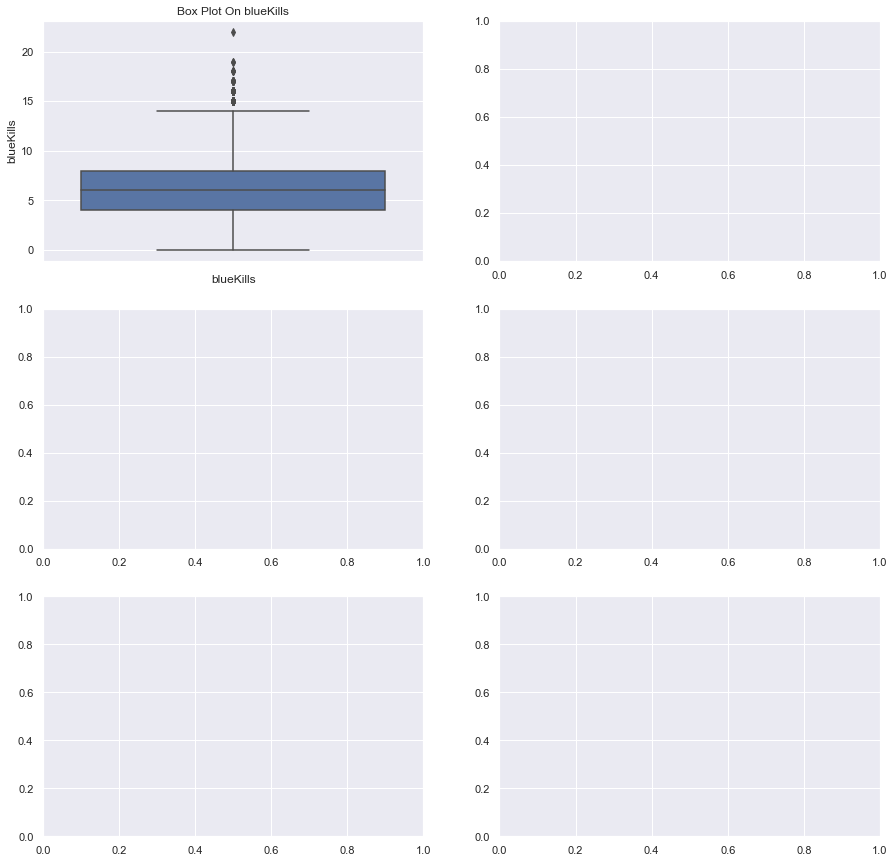

In [6]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 15)
sns.boxplot(data=LOL,y='blueKills',orient='v',ax=axes[0][0])
axes[0][0].set(xlabel='blueKills',title='Box Plot On blueKills')